In [4]:
!pip install geopandas 

C:\Users\IEG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


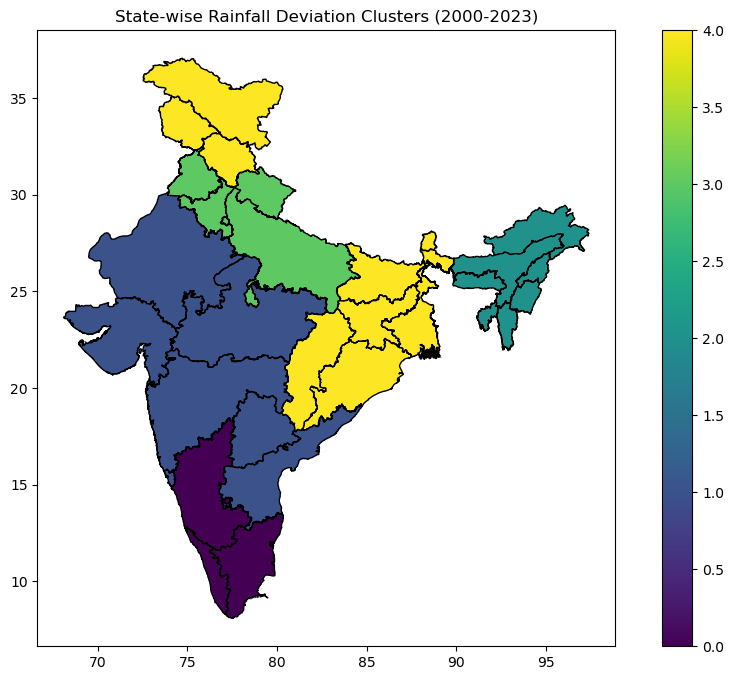

In [12]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the rainfall deviation data (replace 'rainfall_data.csv' with your actual file path)
df = pd.read_csv('rf_dev_cluster.csv')

# Convert the first column to index (State names)
df.set_index('States', inplace=True)

# Normalize the data for better clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Apply K-Means Clustering (5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Load India's shapefile (replace 'india_shapefile.shp' with actual file path)
gdf = gpd.read_file('Admin2.shp')

# Merge cluster data with shapefile
gdf = gdf.merge(df[['Cluster']], left_on='ST_NM', right_index=True, how='left')

# Plot the cluster map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='Cluster', cmap='viridis', legend=True, edgecolor='black', ax=ax)
ax.set_title('State-wise Rainfall Deviation Clusters (2000-2023)')
plt.show()


C:\Users\IEG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\IEG\AppData\Local\Temp\ipykernel_14452\370570246.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['ST_NM']):


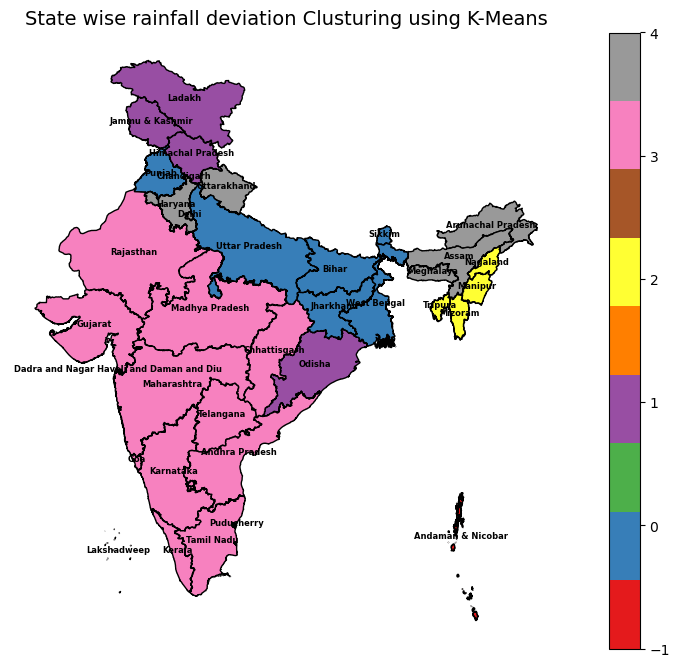

In [14]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the rainfall deviation data
df = pd.read_csv('rf_dev_cluster.csv')

# Convert the first column to index (State names)
df.set_index('States', inplace=True)

# Convert all values to numeric (handling errors)
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(0, inplace=True)  # Replace NaN values with 0

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Apply K-Means Clustering (5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Load India's shapefile
gdf = gpd.read_file('Admin2.shp')

# Ensure column names match exactly
gdf.columns = gdf.columns.str.strip()  # Remove any accidental spaces
df.index = df.index.str.strip()

# Check available columns
if 'ST_NM' not in gdf.columns:
    raise KeyError("Column 'ST_NM' not found in shapefile. Available columns: ", gdf.columns)

# Merge cluster data with shapefile using 'ST_NM'
gdf = gdf.merge(df[['Cluster']], left_on='ST_NM', right_index=True, how='left')

# Fill missing clusters (for visualization purposes)
gdf['Cluster'] = gdf['Cluster'].fillna(-1).astype(int)  # -1 for unclustered states

# Set color map for 5 clusters
cmap = 'Set1'  # Other options: 'coolwarm', 'viridis', 'tab10', 'plasma'

# Plot the cluster map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='Cluster', cmap=cmap, legend=True, edgecolor='black', ax=ax)

# Add state names on the map
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['ST_NM']):
    ax.text(x, y, label, fontsize=6, ha='center', color='black', fontweight='bold')

# Set title and formatting
ax.set_title('State wise rainfall deviation Clusturing using K-Means', fontsize=14)
plt.axis('off')  # Remove axis

plt.show()


C:\Users\IEG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\IEG\AppData\Local\Temp\ipykernel_14452\3106232856.py:49: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['ST_NM']):


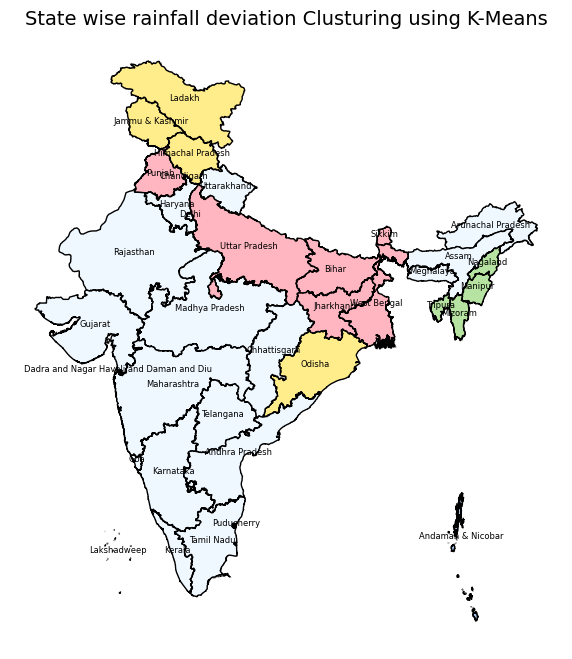

In [34]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the rainfall deviation data
df = pd.read_csv('rf_dev_cluster.csv')

# Convert the first column to index (State names)
df.set_index('States', inplace=True)

# Convert all values to numeric (handling errors)
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(0, inplace=True)  # Replace NaN values with 0

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Apply K-Means Clustering (5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Load India's shapefile
gdf = gpd.read_file('Admin2.shp')

# Ensure column names match exactly
gdf.columns = gdf.columns.str.strip()  # Remove any accidental spaces
df.index = df.index.str.strip()

# Merge cluster data with shapefile using 'ST_NM'
gdf = gdf.merge(df[['Cluster']], left_on='ST_NM', right_index=True, how='left')

# Fill missing clusters (for visualization purposes)
gdf['Cluster'] = gdf['Cluster'].fillna(-1).astype(int)  # -1 for unclustered states

# Define a new set of light, beautiful colors for the clusters
light_colors = ['#A2C2E6', '#FFB6C1', '#FFEC8B', '#B6E3A1', '#F0F8FF']

# Plot the cluster map with the custom colors and no legend
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Use the 'Cluster' column to apply the colors
gdf.plot(column='Cluster', cmap=plt.cm.colors.ListedColormap(light_colors), legend=False, edgecolor='black', ax=ax)

# Add state names in blue color
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['ST_NM']):
    ax.text(x, y, label, fontsize=6, ha='center', color='black', fontweight='light')

# Set title and formatting
ax.set_title('State wise rainfall deviation Clusturing using K-Means', fontsize=14)
plt.axis('off')  # Remove axis

plt.show()


C:\Users\IEG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\IEG\AppData\Local\Temp\ipykernel_14452\213280238.py:49: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['ST_NM']):


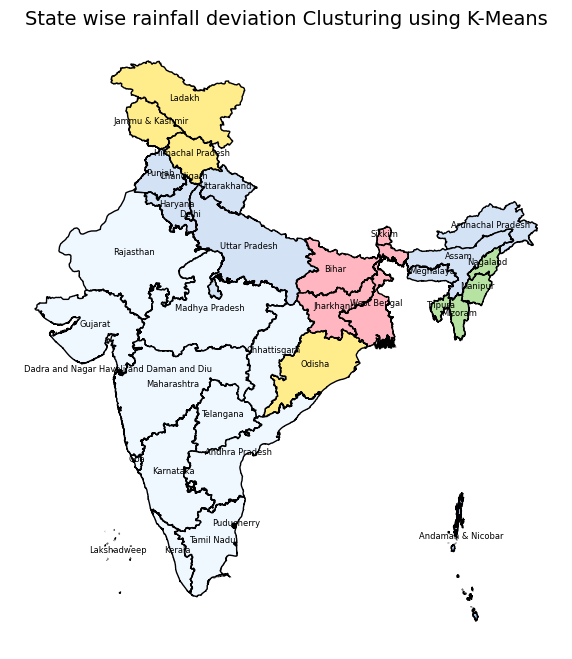

In [44]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the rainfall deviation data
df = pd.read_csv('rf_dev_cluster.csv')

# Convert the first column to index (State names)
df.set_index('States', inplace=True)

# Convert all values to numeric (handling errors)
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(0, inplace=True)  # Replace NaN values with 0

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Apply K-Means Clustering (6 clusters)
kmeans = KMeans(n_clusters=6, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Load India's shapefile
gdf = gpd.read_file('Admin2.shp')

# Ensure column names match exactly
gdf.columns = gdf.columns.str.strip()  # Remove any accidental spaces
df.index = df.index.str.strip()

# Merge cluster data with shapefile using 'ST_NM'
gdf = gdf.merge(df[['Cluster']], left_on='ST_NM', right_index=True, how='left')

# Fill missing clusters (for visualization purposes)
gdf['Cluster'] = gdf['Cluster'].fillna(-1).astype(int)  # -1 for unclustered states

# Define a new set of 6 light, beautiful colors for the clusters
light_colors = ['#A2C2E6', '#FFB6C1', '#FFEC8B', '#B6E3A1', '#F0F8FF', '#D3E2F5']

# Plot the cluster map with the custom colors and no legend
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Use the 'Cluster' column to apply the colors
gdf.plot(column='Cluster', cmap=plt.cm.colors.ListedColormap(light_colors), legend=False, edgecolor='black', ax=ax)

# Add state names in blue color with light font weight
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['ST_NM']):
    ax.text(x, y, label, fontsize=6, ha='center', color='black', fontweight='light')

# Set title and formatting
ax.set_title('State wise rainfall deviation Clusturing using K-Means', fontsize=14)
plt.axis('off')  # Remove axis

plt.show()


C:\Users\IEG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\IEG\AppData\Local\Temp\ipykernel_14452\3253497214.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', 8)  # "tab20" provides a palette with 20 colors
C:\Users\IEG\AppData\Local\Temp\ipykernel_14452\3253497214.py:49: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['ST_NM']):


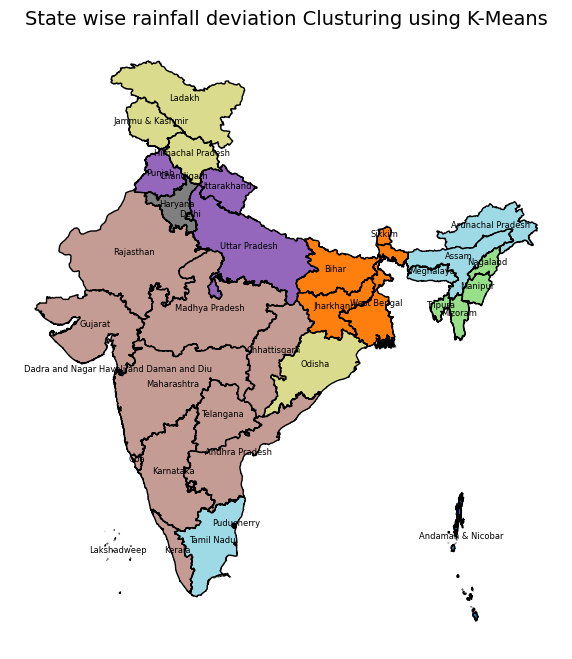

In [48]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the rainfall deviation data
df = pd.read_csv('rf_dev_cluster.csv')

# Convert the first column to index (State names)
df.set_index('States', inplace=True)

# Convert all values to numeric (handling errors)
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(0, inplace=True)  # Replace NaN values with 0

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Apply K-Means Clustering (8 clusters)
kmeans = KMeans(n_clusters=8, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Load India's shapefile
gdf = gpd.read_file('Admin2.shp')

# Ensure column names match exactly
gdf.columns = gdf.columns.str.strip()  # Remove any accidental spaces
df.index = df.index.str.strip()

# Merge cluster data with shapefile using 'ST_NM'
gdf = gdf.merge(df[['Cluster']], left_on='ST_NM', right_index=True, how='left')

# Fill missing clusters (for visualization purposes)
gdf['Cluster'] = gdf['Cluster'].fillna(-1).astype(int)  # -1 for unclustered states

# Define a standard set of 8 colors for the clusters (using the "tab20" colormap)
cmap = plt.cm.get_cmap('tab20', 8)  # "tab20" provides a palette with 20 colors

# Plot the cluster map with the custom colors and no legend
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Use the 'Cluster' column to apply the colors
gdf.plot(column='Cluster', cmap=cmap, legend=False, edgecolor='black', ax=ax)

# Add state names in blue color with light font weight
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['ST_NM']):
    ax.text(x, y, label, fontsize=6, ha='center', color='black', fontweight='light')

# Set title and formatting
ax.set_title('State wise rainfall deviation Clusturing using K-Means', fontsize=14)
plt.axis('off')  # Remove axis

plt.show()
